## 计算α，β


In [1]:
import torch, math, os
from pathlib import Path
from tqdm import tqdm

EPS = 1e-5

# ------------------------------------------------------------
# 工具：统计一个 .pt 列表的全局 mean / std
# ------------------------------------------------------------
def calc_mean_std(pt_list):
    total_sum, total_sq, total_n = 0.0, 0.0, 0
    for f in tqdm(pt_list, desc="scanning", ncols=70):
        X, _ = torch.load(f, map_location='cpu', weights_only=True)  # X: (N,128,128)
        X = X.float()
        total_sum += X.sum().item()
        total_sq  += (X ** 2).sum().item()
        total_n   += X.numel()
    mu  = total_sum / total_n
    var = total_sq / total_n - mu ** 2
    std = math.sqrt(max(var, 0.0))
    return mu, std

# ------------------------------------------------------------
# 读取三个列表
# ------------------------------------------------------------
root = "../../cached_scd_tim/2022_c_64_512sample_hamming"   # 你的数据根
pt_files = sorted([f"{root}/2022_batch_{i:02d}.pt" for i in range(1, 29)])

train_files = pt_files[:10] + pt_files[-10:]   # 01–10 & 19–28
val_files   = pt_files[10:14]                  # 11–14
test_files  = pt_files[14:18]                  # 15–18

# ------------------------------------------------------------
# 逐集合计算 α β
# ------------------------------------------------------------
for tag, flist in [("TRAIN", train_files),
                   ("VAL  ", val_files),
                   ("TEST ", test_files)]:
    mu, std = calc_mean_std(flist)
    alpha   = 1.0 / (std + EPS)
    beta    = -mu * alpha
    print(f"[{tag}]  mean={mu:.6g}  std={std:.6g}  "
          f"α={alpha:.6g}  β={beta:.6g}")

import torch, math, os, csv
from pathlib import Path
from tqdm import tqdm

EPS = 1e-5

def alpha_beta_for_file(pt_path: str):
    """返回 (mu, std, alpha, beta)"""
    X, _ = torch.load(pt_path, map_location="cpu", weights_only=True)  # X:(N,128,128)
    X = X.float()
    mu  = X.mean().item()
    std = X.std(unbiased=False).item()      # population std
    alpha = 1.0 / (std + EPS)
    beta  = -mu * alpha
    return mu, std, alpha, beta

root = "../../cached_scd_tim/2022_c_64_512sample_hamming"
pt_files = sorted([f"{root}/2022_batch_{i:02d}.pt" for i in range(1, 29)])

print("file,   mean,      std,        alpha,       beta")
for f in tqdm(pt_files, desc="per-file α/β"):
    mu, std, a, b = alpha_beta_for_file(f)
    print(f"{Path(f).name}, {mu:.6g}, {std:.6g}, {a:.6g}, {b:.6g}")

for tag, flist in [("TRAIN", train_files)]:
    mu, std = calc_mean_std(flist)
    alpha_train   = 1.0 / (std + EPS)
    beta_train    = -mu * alpha
    print(f"[{tag}]  mean={mu:.6g}  std={std:.6g}  "
          f"α={alpha:.6g}  β={beta:.6g}")


ALPHA = alpha_train      # 1 / (std_train + 1e-5)
BETA  = beta_train        # -mean_train * ALPHA


scanning: 100%|███████████████████████| 20/20 [00:00<00:00, 24.69it/s]


[TRAIN]  mean=4295.14  std=14429.3  α=6.93034e-05  β=-0.297668


scanning: 100%|█████████████████████████| 4/4 [00:00<00:00, 24.82it/s]


[VAL  ]  mean=4258.27  std=14284.5  α=7.00059e-05  β=-0.298104


scanning: 100%|█████████████████████████| 4/4 [00:00<00:00, 25.46it/s]


[TEST ]  mean=4280.03  std=14425.2  α=6.93232e-05  β=-0.296705
file,   mean,      std,        alpha,       beta


per-file α/β:  11%|█         | 3/28 [00:00<00:01, 23.77it/s]

2022_batch_01.pt, 4093.09, 14121.9, 7.08121e-05, -0.289841
2022_batch_02.pt, 4677.42, 15457.6, 6.46929e-05, -0.302596
2022_batch_03.pt, 4209.98, 14110.1, 7.08714e-05, -0.298367
2022_batch_04.pt, 4099.58, 13298.3, 7.51978e-05, -0.308279


per-file α/β:  21%|██▏       | 6/28 [00:00<00:00, 25.18it/s]

2022_batch_05.pt, 4160.33, 14470.6, 6.91056e-05, -0.287502
2022_batch_06.pt, 4662.43, 15452.6, 6.47141e-05, -0.301725


per-file α/β:  32%|███▏      | 9/28 [00:00<00:00, 24.78it/s]

2022_batch_07.pt, 4245.91, 14162.9, 7.06069e-05, -0.29979
2022_batch_08.pt, 4036.47, 13126.1, 7.61838e-05, -0.307513
2022_batch_09.pt, 4190.58, 14581.5, 6.85803e-05, -0.287391
2022_batch_10.pt, 4632.37, 15371.2, 6.50567e-05, -0.301367
2022_batch_11.pt, 4165.24, 13868.5, 7.21059e-05, -0.300338
2022_batch_12.pt, 4072.68, 13271.6, 7.53486e-05, -0.306871


per-file α/β:  54%|█████▎    | 15/28 [00:00<00:00, 25.26it/s]

2022_batch_13.pt, 4184.38, 14623, 6.83853e-05, -0.286151
2022_batch_14.pt, 4610.79, 15287.6, 6.54123e-05, -0.301602
2022_batch_15.pt, 4151.6, 13854.3, 7.21796e-05, -0.299661


per-file α/β:  64%|██████▍   | 18/28 [00:00<00:00, 25.47it/s]

2022_batch_16.pt, 4180.08, 13622.2, 7.34093e-05, -0.306857
2022_batch_17.pt, 4265.58, 15061.6, 6.63939e-05, -0.283209
2022_batch_18.pt, 4522.87, 15096.3, 6.62413e-05, -0.299601


per-file α/β:  75%|███████▌  | 21/28 [00:00<00:00, 25.59it/s]

2022_batch_19.pt, 4192.76, 14169.8, 7.05728e-05, -0.295894
2022_batch_20.pt, 4244.66, 13765.1, 7.26477e-05, -0.308365
2022_batch_21.pt, 4234.7, 15009.7, 6.66235e-05, -0.282131


per-file α/β:  86%|████████▌ | 24/28 [00:00<00:00, 25.68it/s]

2022_batch_22.pt, 4562.91, 15208.6, 6.57524e-05, -0.300022
2022_batch_23.pt, 4215.54, 14297.5, 6.99423e-05, -0.294845
2022_batch_24.pt, 4231.87, 13633.1, 7.33508e-05, -0.310411


per-file α/β:  96%|█████████▋| 27/28 [00:01<00:00, 25.78it/s]

2022_batch_25.pt, 4235.05, 14939.4, 6.69372e-05, -0.283483
2022_batch_26.pt, 4583.8, 15249.2, 6.55771e-05, -0.300592
2022_batch_27.pt, 4221.13, 14273.7, 7.00588e-05, -0.295727


per-file α/β: 100%|██████████| 28/28 [00:01<00:00, 25.41it/s]


2022_batch_28.pt, 4172.21, 13507.8, 7.40314e-05, -0.308875


scanning: 100%|███████████████████████| 20/20 [00:00<00:00, 24.49it/s]

[TRAIN]  mean=4295.14  std=14429.3  α=6.93232e-05  β=-0.296705


In [2]:
import os, random, numpy as np, math, gc, time, torch
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader

# ───────────────────────────────────────────────────────────────
# 0. 环境
# ───────────────────────────────────────────────────────────────
import os, random, numpy as np, torch
from pathlib import Path
from torch.utils.data import Dataset
from tqdm.auto import tqdm

torch.manual_seed(0);  np.random.seed(0);  random.seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("💻 device =", device)

ALPHA = alpha_train      # 1 / (std_train + 1e-5)
BETA  = beta_train        # -mean_train * ALPHA

# ───────────────────────────────────────────────────────────────
# 1. 数据集：128×128 + log1p
# ───────────────────────────────────────────────────────────────
class SCDTensorDataset(Dataset):
    """
    每个 .pt 内:  X (N,128,128)  y (N,1)
    """
    def __init__(self, pt_files):
        self.meta, self.cache, off = [], {}, 0
        for f in pt_files:
            n = torch.load(f, map_location="cpu")[0].shape[0]
            self.meta.append((f, off, off+n));  off += n
        self.N = off

    def __len__(self): return self.N

    def __getitem__(self, idx):
        for f, beg, end in self.meta:
            if beg <= idx < end:
                if f not in self.cache:
                    self.cache[f] = torch.load(f, map_location="cpu",weights_only=True)
                X, y = self.cache[f]
                img = X[idx - beg].float()          # (1,256,256)

                #################  per-image Z-score 标准化(只在PCA中被验证为效果最好) ----------
                # ───── 固定 α/β 归一化 ─────
                img = img * ALPHA + BETA        # 只 1 乘 1 加
                img = img.unsqueeze(0)          # (1,128,128)
                # ───────────────────────────
                ################### -----------------------

                return img, y[idx - beg].long().squeeze()

# ───────────────────────────────────────────────────────────────
# 2. 改良版 ResNet：SCDResNet64
# ───────────────────────────────────────────────────────────────
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)

        self.down = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        # Stem：1×64×64 → 64×32×32
        self.stem = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=3, bias=False),  # 步长由 2 改 1
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)                   # 保留
        )
        # 残差 stages 与原版完全一致
        self.layer1 = make_layer( 64,  64, blocks=3, stride=1)  # 64×32×32
        self.layer2 = make_layer( 64, 128, blocks=3, stride=2)  # 128×16×16
        self.layer3 = make_layer(128, 192, blocks=3, stride=2)  # 192×8×8
        self.layer4 = make_layer(192, 256, blocks=3, stride=2)  # 256×4×4

        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x);  x = self.layer2(x)
        x = self.layer3(x);  x = self.layer4(x)
        return self.head(x)

# ───────────────────────────────────────────────────────────────
# 3. 参数量检查
# ───────────────────────────────────────────────────────────────
net = SCDResNet64().to(device)
print(f"Total params: {sum(p.numel() for p in net.parameters())/1e6:.2f} M")


# %% choose your split  ——  shuffle-split 全样本
from torch.utils.data import Subset


# 文件划分：前10 + 后10 → 训练，中间4+4 → 验证和测试

pt_files = sorted([f"../../cached_scd_tim/2022_c_64_512sample_hamming/2022_batch_{i:02d}.pt" for i in range(1, 29)])  # 01-28
train_files = pt_files[:10] + pt_files[-10:]   # 第01-10, 第19-28
val_files   = pt_files[10:14]                  # 第11-14
test_files  = pt_files[14:18]                  # 第15-18

train_ds = SCDTensorDataset(train_files)
val_ds   = SCDTensorDataset(val_files)
test_ds  = SCDTensorDataset(test_files)

print(f"🔀 Shuffled split → train {len(train_ds):,} | val {len(val_ds):,} | test {len(test_ds):,}")

# 4. DataLoader（其余参数保持原样）
num_workers = 4
batch_size  = 32
train_ld = DataLoader(train_ds, batch_size, shuffle=True,
                      num_workers=num_workers, pin_memory=(device == "cuda"))
val_ld   = DataLoader(val_ds,   batch_size, shuffle=False,
                      num_workers=num_workers, pin_memory=(device == "cuda"))
test_ld  = DataLoader(test_ds,  batch_size, shuffle=False,
                      num_workers=num_workers, pin_memory=(device == "cuda"))

# %% training
net = SCDResNet64(n_cls=8).to(device)
for m in net.modules():                           # ★ 新增：减缓 BN 统计抖动
    if isinstance(m, nn.BatchNorm2d):
        m.momentum = 0.1          # 原默认 0.1


# ------------------- 1️⃣  定义优化器 -------------------
optim = torch.optim.SGD(net.parameters(), lr=0.1,
                        momentum=0.9, weight_decay=1e-4)

# ------------------- 2️⃣  构造调度器 -------------------
warm_epochs   = 5          # 线性预热 5 epoch
total_epochs  = 500        # 总训练周期
eta_min       = 1e-8       # Cosine 末尾最小 lr

warmup = torch.optim.lr_scheduler.LinearLR(
            optim, start_factor=0.1, end_factor=1.0, total_iters=warm_epochs)

cosine = torch.optim.lr_scheduler.CosineAnnealingLR(
            optim, T_max=total_epochs - warm_epochs, eta_min=eta_min)

# SequentialLR 会先跑 warmup，再接 cosine
scheduler = torch.optim.lr_scheduler.SequentialLR(
               optim, schedulers=[warmup, cosine],
               milestones=[warm_epochs])        # 切换点=5

crit = nn.CrossEntropyLoss(label_smoothing=0.05)   # ★ 改：加入 label-smoothing

def run_epoch(loader, training=True):
    net.train(training)
    tot=loss_sum=acc=0
    for xb, yb in loader:
        xb,yb = xb.to(device), yb.to(device)
        with torch.set_grad_enabled(training):
            out  = net(xb)
            loss = crit(out,yb)
            if training:
                optim.zero_grad(); loss.backward()
                torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)   # ★ 新增：梯度裁剪
                optim.step()
        pred = out.argmax(1)
        bsz  = yb.size(0)
        tot  += bsz
        loss_sum += loss.item()*bsz
        acc  += (pred==yb).sum().item()
    return loss_sum/tot, acc/tot


best = 0
epochs=total_epochs

for ep in range(1, epochs+1):
    tr_l, tr_a = run_epoch(train_ld, True)
    vl_l, vl_a = run_epoch(val_ld, False)
    ts_l, ts_a = run_epoch(test_ld, False)   # 👈 直接监控 test

    print(f"E{ep:02d}  train {tr_a*100:5.2f}% | loss {tr_l:.4f}   "
          f"val {vl_a*100:5.2f}% | loss {vl_l:.4f}   "
          f"test {ts_a*100:5.2f}% | loss {ts_l:.4f}")

    scheduler.step()        # ← 每个 epoch 调一次

    if vl_a > best:
        best = vl_a
        torch.save(net.state_dict(), "best_scd_resnet.pth")

    print("current lr =", optim.param_groups[0]['lr'])

print("✅ Best val acc:", best)

# evaluate best on test
net.load_state_dict(torch.load("best_scd_resnet.pth"))
net.eval()
test_loss, test_acc = run_epoch(test_ld, training=False)
print(f"🧪 Final Test Accuracy: {test_acc*100:.2f}%")

# ───────────────────────────────────────────────────────────────
# ⏱️ 单张图像推理时间评估
# ───────────────────────────────────────────────────────────────
import time

# 从 test_ld 中取一张图像（确保在 eval 模式，无梯度）
net.eval()
xb, yb = next(iter(test_ld))
img = xb[0:1].to(device)    # 取第 0 张，保持 shape = (1, 1, 256, 256)

with torch.no_grad():
    torch.cuda.synchronize() if device == "cuda" else None
    t0 = time.time()
    out = net(img)
    torch.cuda.synchronize() if device == "cuda" else None
    t1 = time.time()

print(f"⏱️ Inference time for 1 image: {(t1 - t0)*1000:.2f} ms")


💻 device = cuda
Total params: 6.40 M


/tmp/ipykernel_31595/3861110918.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  n = torch.load(f, map_location="cpu")[0].shape[0]


🔀 Shuffled split → train 80,000 | val 16,000 | test 16,000
E01  train 16.60% | loss 2.0664   val 17.54% | loss 2.0321   test 17.49% | loss 2.0328
current lr = 0.028000000000000004
E02  train 17.37% | loss 2.0356   val 17.81% | loss 2.0114   test 18.22% | loss 2.0119
current lr = 0.046000000000000006
E03  train 17.48% | loss 2.0247   val 16.76% | loss 2.0343   test 16.77% | loss 2.0346
current lr = 0.064
E04  train 17.51% | loss 2.0204   val 17.82% | loss 2.0098   test 17.78% | loss 2.0105
current lr = 0.082
E05  train 17.76% | loss 2.0069   val 17.61% | loss 2.0113   test 17.58% | loss 2.0111
current lr = 0.1


/home/ruilin/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


E06  train 18.13% | loss 1.9905   val 18.57% | loss 1.9768   test 18.49% | loss 1.9773
current lr = 0.09999899300374603
E07  train 18.55% | loss 1.9795   val 18.31% | loss 1.9929   test 18.21% | loss 1.9948
current lr = 0.09999597205554578
E08  train 18.60% | loss 1.9745   val 18.84% | loss 1.9663   test 18.93% | loss 1.9671
current lr = 0.09999093727708258
E09  train 18.69% | loss 1.9694   val 18.73% | loss 1.9648   test 18.88% | loss 1.9660
current lr = 0.09998388887115658
E10  train 19.05% | loss 1.9658   val 19.14% | loss 1.9634   test 18.92% | loss 1.9648
current lr = 0.09997482712167656
E11  train 19.00% | loss 1.9638   val 18.51% | loss 1.9687   test 18.51% | loss 1.9697
current lr = 0.09996375239364846
E12  train 19.16% | loss 1.9627   val 19.49% | loss 1.9551   test 19.28% | loss 1.9566
current lr = 0.09995066513316068
E13  train 19.69% | loss 1.9549   val 19.94% | loss 1.9555   test 19.98% | loss 1.9555
current lr = 0.09993556586736622
E14  train 20.13% | loss 1.9496   val 21

/tmp/ipykernel_31595/3861110918.py:218: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("best_scd_resnet.pth"))


🧪 Final Test Accuracy: 97.08%
⏱️ Inference time for 1 image: 179.82 ms


In [9]:
# =============================================================
# 0. 环境与随机种子
# =============================================================
import os, random, time, gc, math, numpy as np, torch
from pathlib import Path
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("💻 device =", device)
# 训练集统计得到的常量
ALPHA = 2.57639e-07      # 1 / (std_train + 1e-5)
BETA  = -0.306756        # -mean_train * ALPHA
# =============================================================
# 1. 数据集：SCDTensorDataset  (与 Teacher 版完全一致)
# =============================================================
class SCDTensorDataset(Dataset):
    """
    每个 .pt: (X, y)  X shape=(N,128,128) or (N,256,256)  y shape=(N,1)
    """
    def __init__(self, pt_files):
        self.meta, self.cache, off = [], {}, 0
        for f in pt_files:
            n = torch.load(f, map_location="cpu")[0].shape[0]
            self.meta.append((f, off, off+n)); off += n
        self.N = off

    def __len__(self): return self.N

    def __getitem__(self, idx):
        for f, beg, end in self.meta:
            if beg <= idx < end:
                if f not in self.cache:
                    self.cache[f] = torch.load(f, map_location="cpu", weights_only=True)
                X, y = self.cache[f]
                img  = X[idx - beg].float()
                # ───── 固定 α/β 归一化 ─────
                img = img * ALPHA + BETA        # 只 1 乘 1 加
                img = img.unsqueeze(0)          # (1,128,128)
                # ───────────────────────────
                return img, y[idx - beg].long().squeeze()

# =============================================================
# 2. Teacher 网络 (与你保存的完全一致) + Student 网络
# =============================================================
import torch.nn as nn
import torch.nn.functional as F

class DropPath(nn.Module):
    def __init__(self, p=0.1):
        super().__init__()
        self.p = p
    def forward(self, x):
        if not self.training or self.p == 0.:
            return x
        keep = torch.rand((x.size(0), 1, 1, 1), device=x.device) > self.p
        return x * keep / (1 - self.p)
   


# ---------- Teacher 基本块 ----------
class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1, drop_prob=0.0):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))
        # ★ 预先实例化 DropPath
        self.drop = DropPath(drop_prob)

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        y = self.drop(y)                 # ★ 训练时随机丢残差
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride, p=0.1):
    layers = [BasicBlock(in_c, out_c, stride, drop_prob=p)]
    layers += [BasicBlock(out_c, out_c, 1, drop_prob=p) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

# ---------- Teacher 全网 ----------
class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem   = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)

# ---------- Student 0.59M 参数 ----------
class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch = [14, 18, 26, 36, 52]   # 总参数≈0.154 M
        self.stem   = nn.Sequential(
            nn.Conv2d(1, ch[0], 3, 1, 1, bias=False),
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3,2,1))
        self.layer1 = make_layer(ch[0], ch[1], 1, 1)
        self.layer2 = make_layer(ch[1], ch[2], 1, 2)
        self.layer3 = make_layer(ch[2], ch[3], 2, 2)  # ★ 多 1 个块
        self.layer4 = make_layer(ch[3], ch[4], 2, 2)  # ★ 多 1 个块
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), nn.Flatten(),
            nn.Linear(ch[4], n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)

 

# =============================================================
# 3. 数据划分（固定 10+10 训练，4 验证，4 测试）
# =============================================================
pt_files = sorted([f"../../cached_scd_tim/2022_c_64/2022_batch_{i:02d}.pt"
                   for i in range(1, 29)])       # 01-28
train_files = pt_files[:10] + pt_files[-10:]     # 01-10 & 19-28
val_files   = pt_files[10:14]                    # 11-14
test_files  = pt_files[14:18]                    # 15-18

train_ds = SCDTensorDataset(train_files)
val_ds   = SCDTensorDataset(val_files)
test_ds  = SCDTensorDataset(test_files)
print(f"📂 train {len(train_ds):,} | val {len(val_ds):,} | test {len(test_ds):,}")

loader_cfg = dict(batch_size=32, num_workers=4,
                  pin_memory=(device=='cuda'))
train_ld = DataLoader(train_ds, shuffle=True,  **loader_cfg)
val_ld   = DataLoader(val_ds,   shuffle=False, **loader_cfg)
test_ld  = DataLoader(test_ds,  shuffle=False, **loader_cfg)

# =============================================================
# 4. 蒸馏工具函数
# =============================================================
def kd_loss(s_logit, t_logit, y, T=6.0, alpha=0.9, ls=0.05):
    kd = F.kl_div(
        F.log_softmax(s_logit/T, dim=1),
        F.softmax(t_logit/T, dim=1),
        reduction='batchmean') * (T*T)
    ce = F.cross_entropy(s_logit, y, label_smoothing=ls)
    return alpha*kd + (1-alpha)*ce

@torch.no_grad()
def eval_model(model, loader):
    model.eval()
    tot = loss_sum = acc = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = F.cross_entropy(out, yb)
        pred = out.argmax(1)
        bsz  = yb.size(0)
        tot += bsz
        loss_sum += loss.item()*bsz
        acc += (pred==yb).sum().item()
    return loss_sum/tot, acc/tot

# =============================================================
# 5. 训练 KD（调度与 Teacher 对齐）
# =============================================================
teacher = SCDResNet64(); teacher.load_state_dict(
    torch.load("best_scd_resnet.pth", map_location=device))
teacher.eval().to(device)

student = SCDResNet64_Student().to(device)
print(f"Student params: {sum(p.numel() for p in student.parameters())/1e6:.2f} M")





# ---- 优化器 ----
opt = torch.optim.SGD(student.parameters(), lr=0.05,
                      momentum=0.9, weight_decay= 1e-4)

# ---- 学习率调度：5 个 epoch 线性 warm-up，然后 Cosine ----
warm_epochs   = 5
total_epochs  = 500
eta_min       = 1e-10                       # 余弦最低 lr

warmup = torch.optim.lr_scheduler.LinearLR(
            opt, start_factor=0.1, end_factor=1.0, total_iters=warm_epochs)
cosine = torch.optim.lr_scheduler.CosineAnnealingLR(
            opt, T_max=total_epochs - warm_epochs, eta_min=eta_min)

sched = torch.optim.lr_scheduler.SequentialLR(
            opt, schedulers=[warmup, cosine], milestones=[warm_epochs])

best_val = 0.0
for epoch in range(1, total_epochs + 1):
    # ===== 训练阶段 =====
    student.train()
    tr_tot = tr_loss_sum = tr_correct = 0
    for xb, yb in train_ld:
        xb, yb = xb.to(device), yb.to(device)
        with torch.no_grad():
            t_out = teacher(xb)
        s_out  = student(xb)
        loss   = kd_loss(s_out, t_out, yb)

        opt.zero_grad(); loss.backward()
        torch.nn.utils.clip_grad_norm_(student.parameters(), 1.0)
        opt.step()

        # 累计训练指标
        bsz = yb.size(0)
        tr_tot       += bsz
        tr_loss_sum  += loss.item() * bsz
        tr_correct   += (s_out.argmax(1) == yb).sum().item()

    sched.step()           # 更新 lr

    # 计算 train epoch 指标
    train_loss = tr_loss_sum / tr_tot
    train_acc  = tr_correct  / tr_tot

    # ===== 验证 & 测试阶段 =====
    val_loss,  val_acc  = eval_model(student, val_ld)
    test_loss, test_acc = eval_model(student, test_ld)

    # 打印与保存
    print(f"E{epoch:03d} | "
          f"train {train_acc*100:5.2f}% / {train_loss:.4f}   "
          f"val {val_acc*100:5.2f}% / {val_loss:.4f}   "
          f"test {test_acc*100:5.2f}% / {test_loss:.4f}   "
          f"lr {sched.get_last_lr()[0]:.3e}")

    if val_acc > best_val:
        best_val = val_acc
        torch.save(student.state_dict(), "best_student.pth")

print("✅ KD finished. Best val acc:", best_val*100)



# =============================================================
# 6. 最终测试
# =============================================================
student.load_state_dict(torch.load("best_student.pth"))
_, test_acc = eval_model(student, test_ld)
print(f"🧪 Student Test Accuracy: {test_acc*100:.2f}%")

# =============================================================
# 7. 单张推理时延
# =============================================================
xb, _ = next(iter(test_ld))
img = xb[0:1].to(device)
torch.cuda.synchronize() if device=='cuda' else None
t0 = time.time()
_ = student(img)
torch.cuda.synchronize() if device=='cuda' else None
t1 = time.time()
print(f"⏱️ Student inference (1 img): {(t1-t0)*1000:.2f} ms")


💻 device = cuda


/tmp/ipykernel_350822/1792734876.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  n = torch.load(f, map_location="cpu")[0].shape[0]


📂 train 80,000 | val 16,000 | test 16,000
Student params: 0.15 M


/tmp/ipykernel_350822/1792734876.py:191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("best_scd_resnet.pth", map_location=device))


E001 | train 16.90% / 2.0848   val 17.93% / 2.0239   test 17.84% / 2.0242   lr 1.400e-02
E002 | train 17.52% / 2.0710   val 17.83% / 2.0107   test 17.81% / 2.0111   lr 2.300e-02
E003 | train 17.67% / 2.0618   val 17.66% / 2.0040   test 17.65% / 2.0040   lr 3.200e-02
E004 | train 17.81% / 2.0579   val 18.09% / 1.9947   test 18.08% / 1.9948   lr 4.100e-02
E005 | train 17.82% / 2.0557   val 18.59% / 1.9947   test 18.44% / 1.9951   lr 5.000e-02
E006 | train 17.89% / 2.0542   val 18.44% / 1.9928   test 18.72% / 1.9932   lr 5.000e-02
E007 | train 17.98% / 2.0487   val 18.28% / 1.9884   test 18.15% / 1.9885   lr 5.000e-02
E008 | train 18.46% / 2.0415   val 18.88% / 1.9806   test 18.76% / 1.9808   lr 5.000e-02
E009 | train 18.75% / 2.0357   val 19.83% / 1.9670   test 19.82% / 1.9683   lr 4.999e-02
E010 | train 19.27% / 2.0284   val 20.26% / 1.9566   test 20.12% / 1.9572   lr 4.999e-02
E011 | train 20.24% / 2.0189   val 20.92% / 1.9544   test 20.92% / 1.9564   lr 4.998e-02
E012 | train 20.93% /

/tmp/ipykernel_350822/1792734876.py:268: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load("best_student.pth"))


🧪 Student Test Accuracy: 83.16%
⏱️ Student inference (1 img): 3.28 ms


In [ ]:
import torch, torch.nn as nn, torch.nn.functional as F
from collections import OrderedDict
from functools import reduce
from operator import mul

# ──────────────────── Student 网络定义 ────────────────────
class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))
    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    lays = [BasicBlock(in_c, out_c, stride)]
    lays += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*lays)

class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch = [24, 24, 48, 72, 96]
        self.stem   = nn.Sequential(
            nn.Conv2d(1, ch[0], 3, 1, 1, bias=False),
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer(ch[0], ch[1], 2, 1)
        self.layer2 = make_layer(ch[1], ch[2], 2, 2)
        self.layer3 = make_layer(ch[2], ch[3], 2, 2)
        self.layer4 = make_layer(ch[3], ch[4], 2, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), nn.Flatten(),
            nn.Dropout(0.4), nn.Linear(ch[4], n_cls))
    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)

# ──────────────────── 逐层统计脚本 ────────────────────
device      = "cpu"
model       = SCDResNet64_Student().to(device)
records     = OrderedDict()

def is_leaf(m): return len(list(m.children())) == 0
def numel(shape): return int(reduce(mul, shape, 1))          # (C,H,W) -> 元素个数

def register_hook(mod, name):
    def hook(mod, inp, out):
        info = {
            "type":   mod.__class__.__name__,
            "in":     tuple(inp[0].shape),
            "out":    tuple(out.shape) if isinstance(out, torch.Tensor) else tuple(out[0].shape),
            "params": sum(p.numel() for p in mod.parameters()),
            "macs":   0,      # default
        }
        # ── 额外字段：核/步幅/填充 & MACs ───────────────────────────────
        if isinstance(mod, nn.Conv2d):
            Kh, Kw  = mod.kernel_size
            Hout, Wout = info["out"][2], info["out"][3]
            Cin, Cout = info["in"][1], info["out"][1]
            info["ksp"] = f"K({Kh},{Kw}) S{mod.stride} P{mod.padding}"
            info["macs"] = Cout * Cin // mod.groups * Kh * Kw * Hout * Wout
        elif isinstance(mod, nn.MaxPool2d):
            info["ksp"] = f"K{mod.kernel_size} S{mod.stride} P{mod.padding}"
        elif isinstance(mod, nn.AvgPool2d):
            info["ksp"] = f"K{mod.kernel_size} S{mod.stride}"
        elif isinstance(mod, nn.Linear):
            info["ksp"] = f"[in={mod.in_features}, out={mod.out_features}]"
            info["macs"] = mod.in_features * mod.out_features
        else:
            info["ksp"] = ""
        # 元素数量
        info["in_ne"]  = numel(info["in"][1:])   # 去掉 batch 维
        info["out_ne"] = numel(info["out"][1:])
        records[name]  = info
    return hook

for n, m in model.named_modules():
    if n and is_leaf(m):
        m.register_forward_hook(register_hook(m, n))

_ = model(torch.randn(1, 1, 64, 64, device=device))

# ──────────────────── 打印结果 ────────────────────
hdr = ("Module", "Type", "Input→Output", "ElemsIn", "ElemsOut",
       "Kernel/Stride/Padding", "#P", "MACs")
print(f"{hdr[0]:<32} {hdr[1]:<14} {hdr[2]:<28} {hdr[3]:>9} {hdr[4]:>10} "
      f"{hdr[5]:<22} {hdr[6]:>10} {hdr[7]:>12}")
print("-"*149)

total_params = total_macs = 0
for n, d in records.items():
    io  = f"{list(d['in'])[1:]}→{list(d['out'])[1:]}"
    print(f"{n:<32} {d['type']:<14} {io:<28} "
          f"{d['in_ne']:>9,} {d['out_ne']:>10,} "
          f"{d['ksp']:<22} {d['params']:>10,} {d['macs']:>12,}")
    total_params += d['params']
    total_macs   += d['macs']

print("-"*149)
print(f"{'Total unique parameters':<122} {total_params:,}  ({total_params/1e6:.2f} M)")
print(f"{'Total MACs per sample':<122} {total_macs:,}  ({total_macs/1e6:.2f} M)")

'''
def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))
'''

Module                           Type           Input→Output                   ElemsIn   ElemsOut Kernel/Stride/Padding          #P         MACs
-----------------------------------------------------------------------------------------------------------------------------------------------------
stem.0                           Conv2d         [1, 64, 64]→[24, 64, 64]         4,096     98,304 K(3,3) S(1, 1) P(1, 1)        216      884,736
stem.1                           BatchNorm2d    [24, 64, 64]→[24, 64, 64]       98,304     98,304                                48            0
stem.2                           ReLU           [24, 64, 64]→[24, 64, 64]       98,304     98,304                                 0            0
stem.3                           MaxPool2d      [24, 64, 64]→[24, 32, 32]       98,304     24,576 K3 S2 P1                        0            0
layer1.0.conv1                   Conv2d         [24, 32, 32]→[24, 32, 32]       24,576     24,576 K(3,3) S(1, 1) P(1, 1)     

## 推理时间

In [5]:
#!/usr/bin/env python
# end2end_latency_tim2infer_nods.py
# ------------------------------------------------------------
# 只计时：CPU→GPU (2048 IQ) → SCD 计算 → Patch64 → Student 推理
# 排除：磁盘读取 & 32768→2048 降采样
# ------------------------------------------------------------
import os, glob, time, math, gc, random
import numpy as np
import torch
from scipy.signal import decimate
import os, random, numpy as np, math, gc, time, torch
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
# ───────────────────────────────────────────────────────────────
# 0. 环境
# ───────────────────────────────────────────────────────────────
import os, random, numpy as np, torch
from pathlib import Path
from torch.utils.data import Dataset
from tqdm.auto import tqdm

torch.set_grad_enabled(False)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("⚙️  running on", DEVICE)

ROOT_TXT   = "../../CSPB.ML_dataset/CSPB_ML_2022_Data_2048"
PATCH_R0C0 = 96                # 中心 64×64 起点
N_TEST     = 1000               # 随机抽取文件数
DELAY      = 0.05              # 给 GPU 一点休息时间，避免温度联动
DTYPE_OUT  = torch.float32                # 最终输出精度
# ------------------------------------------------------------
# Student 网络（与之前一致，略）……
# （此处粘贴你的 SCDResNet64_Student 定义与权重加载）
# ------------------------------------------------------------
# ---------- Teacher 基本块 ----------
# ---------- Teacher 基本块 ----------
class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

# ---------- Teacher 全网 ----------
class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem   = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)

    

student = SCDResNet64_Student().to(DEVICE)
student.load_state_dict(torch.load("best_student.pth", map_location=DEVICE))
student.eval()
print(f"🧠 Student params: {sum(p.numel() for p in student.parameters())/1e6:.2f} M")

# ------------------------------------------------------------
# 工具函数
# ------------------------------------------------------------
def decimate_complex(x: np.ndarray, q: int = 16) -> np.ndarray:
    re = decimate(np.real(x), q, ftype='fir', zero_phase=True)
    im = decimate(np.imag(x), q, ftype='fir', zero_phase=True)
    return re + 1j * im

def iq2_scd_matrix_torch(iq_2048: torch.Tensor) -> torch.Tensor:
    """
    2048 点复数 IQ (CUDA) → (256,256) torch.float32 SCD 矩阵
    代码与训练时保持一致（略掉注释以精简）
    """
    Np, L, P = 256, 64, 32
    NN = (P - 1) * L + Np
    if iq_2048.numel() < NN:
        pad = torch.zeros(NN - iq_2048.numel(), dtype=iq_2048.dtype, device=iq_2048.device)
        sig = torch.cat([iq_2048, pad])
    else:
        sig = iq_2048

    X = torch.stack([sig[k*L:k*L+Np] for k in range(P)], dim=1)  # (256,32)

    # ✅ Chebyshev-500 窗函数（直接复用已有的完整数组）
    a_np = np.array([0.079999924,0.08013916,0.080558777,0.081256866,0.082231522,0.083486557,0.085018158,0.086826324,0.088907242,0.091264725,0.093893051,0.096792221,0.099962234,0.10339737,0.10709953,0.111063,0.11528778,0.11976814,0.124506,0.12949562,0.13473511,0.14021873,0.1459465,0.15191269,0.15811539,0.16454887,0.17121124,0.17809677,0.18520355,0.19252396,0.20005608,0.20779419,0.21573448,0.22387123,0.23220062,0.24071503,0.24941254,0.25828743,0.26733208,0.27654266,0.28591156,0.29543686,0.30510902,0.31492615,0.32487679,0.33496094,0.34516716,0.35549355,0.36593056,0.37647438,0.38711739,0.39785194,0.40867424,0.41957474,0.43054962,0.44159126,0.45269203,0.4638443,0.47504425,0.48628426,0.49755669,0.50885391,0.52017021,0.53149986,0.54283333,0.55416489,0.56548882,0.57679749,0.58808327,0.59934044,0.61055946,0.62173843,0.63286591,0.64393806,0.65494537,0.66588593,0.67674828,0.6875267,0.69821739,0.70881081,0.71930122,0.72968483,0.73995209,0.75009727,0.76011467,0.77000046,0.7797451,0.78934479,0.79879189,0.80808449,0.81721115,0.82617188,0.83495903,0.84356499,0.85198784,0.86022186,0.86826134,0.87610054,0.88373566,0.89116287,0.89837646,0.90537262,0.91214752,0.91869545,0.9250145,0.93109894,0.93694687,0.94255447,0.94791603,0.95302963,0.95789337,0.96250343,0.96685791,0.97095108,0.97478485,0.9783535,0.98165512,0.98468971,0.98745537,0.98994827,0.99216843,0.99411201,0.99578285,0.99717522,0.99829102,0.99912834,0.99968529,0.99996567,0.99996567,0.99968529,0.99912834,0.99829102,0.99717522,0.99578285,0.99411201,0.99216843,0.98994827,0.98745537,0.98468971,0.98165512,0.9783535,0.97478485,0.97095108,0.96685791,0.96250343,0.95789337,0.95302963,0.94791603,0.94255447,0.93694687,0.93109894,0.9250145,0.91869545,0.91214752,0.90537262,0.89837646,0.89116287,0.88373566,0.87610054,0.86826134,0.86022186,0.85198784,0.84356499,0.83495903,0.82617188,0.81721115,0.80808449,0.79879189,0.78934479,0.7797451,0.77000046,0.76011467,0.75009727,0.73995209,0.72968483,0.71930122,0.70881081,0.69821739,0.6875267,0.67674828,0.66588593,0.65494537,0.64393806,0.63286591,0.62173843,0.61055946,0.59934044,0.58808327,0.57679749,0.56548882,0.55416489,0.54283333,0.53149986,0.52017021,0.50885391,0.49755669,0.48628426,0.47504425,0.4638443,0.45269203,0.44159126,0.43054962,0.41957474,0.40867424,0.39785194,0.38711739,0.37647438,0.36593056,0.35549355,0.34516716,0.33496094,0.32487679,0.31492615,0.30510902,0.29543686,0.28591156,0.27654266,0.26733208,0.25828743,0.24941254,0.24071503,0.23220062,0.22387123,0.21573448,0.20779419,0.20005608,0.19252396,0.18520355,0.17809677,0.17121124,0.16454887,0.15811539,0.15191269,0.1459465,0.14021873,0.13473511,0.12949562,0.124506,0.11976814,0.11528778,0.111063,0.10709953,0.10339737,0.099962234,0.096792221,0.093893051,0.091264725,0.088907242,0.086826324,0.085018158,0.083486557,0.082231522,0.081256866,0.080558777,0.08013916,0.079999924], dtype=np.float32)  
    a = torch.tensor(a_np, device='cuda')     # 转为 CUDA Tensor

    # 加窗
    XW = a[:, None] * X

    XF1 = torch.fft.fft(XW * X, dim=0)
    XF1 = torch.cat([XF1[Np//2:], XF1[:Np//2]], dim=0)

    k = torch.arange(-Np//2, Np//2, device=sig.device)[:, None]
    idx = torch.arange(P, device=sig.device)[None, :]
    E = torch.exp(-1j * 2 * math.pi * k * idx * L / Np)
    XD = (XF1 * E).T

    XM = XD[:, :, None] * XD[:, None, :].conj()
    XM = XM.reshape(P, -1)
    XF2 = torch.fft.fft(XM, dim=0)
    Z = torch.abs(XF2) ** 2

    out = torch.zeros((16, Z.shape[1]), device=iq_2048.device)
    out[:8] = Z[P//2 : 3*P//4]
    out[8:] = Z[P//4 : P//2]

   
    return out[8].reshape(256, 256).T.to(DTYPE_OUT)

# ------------------------------------------------------------
# （1）读取 txt → (2048,) complex64 GPU
# ------------------------------------------------------------
def txt2048_to_iq_cuda(txt_path: str) -> torch.Tensor:
    """
    读取单个 txt，格式：2048 行  “Re  Im”，float32
    返回：torch.complex64 (2048,)  GPU tensor
    """
    data = np.loadtxt(txt_path, dtype=np.float32)      # shape=(2048,2)
    iq   = np.ascontiguousarray(data[:,0] + 1j*data[:,1], dtype=np.complex64)
    return torch.from_numpy(iq).to(DEVICE)

# ------------------------------------------------------------
# （2）SCD → Patch64，按训练时归一化
# ------------------------------------------------------------

ALPHA = 6.93232e-05      # 1 / (std_train + 1e-5)
BETA  = -0.296705       # -mean_train * ALPHA
def scd_patch64_from_iq(iq_cuda: torch.Tensor) -> torch.Tensor:
    scd256 = iq2_scd_matrix_torch(iq_cuda)
    r0 = PATCH_R0C0
    patch = scd256[r0:r0+64, r0:r0+64]
    patch = patch * ALPHA + BETA                     # 先乘再加
    return patch.unsqueeze(0)   # (1,64,64)

# ------------------------------------------------------------
# 3. 计时钩子
# ------------------------------------------------------------
USE_GPU = (DEVICE == "cuda")
layer_names  = ["stem", "layer1", "layer2", "layer3", "layer4", "head"]
timer_sum_ms = {k: 0.0 for k in layer_names}
timer_sum_ms["preprocess"] = 0.0
timer_cnt = 0

def add_layer_hooks(net: nn.Module):
    for name in layer_names:
        mod = getattr(net, name)

        if USE_GPU:                          # GPU 计时
            s_evt = torch.cuda.Event(enable_timing=True)
            e_evt = torch.cuda.Event(enable_timing=True)

            def pre(_, __, evt=s_evt):       # ← 把对象写进默认实参
                evt.record()

            def post(_, __, ___,
                     s_evt=s_evt, e_evt=e_evt, layer=name):
                e_evt.record(); torch.cuda.synchronize()
                dt = s_evt.elapsed_time(e_evt)       # ms
                timer_sum_ms[layer] += dt

        else:                                # CPU 计时
            def pre(_, __, layer=name):
                mod._t0 = time.perf_counter()

            def post(_, __, ___, layer=name):
                dt = (time.perf_counter() - mod._t0) * 1e3
                timer_sum_ms[layer] += dt

        mod.register_forward_pre_hook(pre)
        mod.register_forward_hook(post)


add_layer_hooks(student)

# ------------------------------------------------------------
# 4. 收集测试文件
# ------------------------------------------------------------
txt_files = sorted(glob.glob(os.path.join(ROOT_TXT,
                                          "Batch_Dir_*", "signal_*.txt")))
random.shuffle(txt_files)
txt_files = txt_files[:N_TEST]

# ------------------------------------------------------------
# 5. 推理循环
# ------------------------------------------------------------
 
for txt_path in tqdm(txt_files, desc="Infer"):
    gc.collect(); torch.cuda.empty_cache(); time.sleep(DELAY)

    # 预处理计时
    if USE_GPU:
        p_s, p_e = torch.cuda.Event(True), torch.cuda.Event(True)
        p_s.record()
    else:
        t0 = time.perf_counter()

    iq_cuda = txt2048_to_iq_cuda(txt_path)
    img     = scd_patch64_from_iq(iq_cuda)            # 1×64×64

    if USE_GPU:
        p_e.record(); torch.cuda.synchronize()
        timer_sum_ms["preprocess"] += p_s.elapsed_time(p_e)
    else:
        timer_sum_ms["preprocess"] += (time.perf_counter()-t0)*1e3

    _ = student(img.unsqueeze(0))                     # forward
    timer_cnt += 1




# ------------------------------------------------------------
# 6. 打印结果
# ------------------------------------------------------------
print(f"\n📊  Average latency per stage ({timer_cnt} samples)")
print("────────────────────────────────────────────────────")
for k in ["preprocess"] + layer_names:
    print(f"{k:<10}: {timer_sum_ms[k]/timer_cnt:8.3f}  ms")

total_avg = sum(timer_sum_ms.values()) / timer_cnt
print("────────────────────────────────────────────────────")
print(f"{'Total':<10}: {total_avg:8.3f}  ms")
print("────────────────────────────────────────────────────")

⚙️  running on cuda
🧠 Student params: 0.59 M


/tmp/ipykernel_134615/149786502.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load("best_student.pth", map_location=DEVICE))


Infer:   0%|          | 0/1000 [00:00<?, ?it/s]


📊  Average latency per stage (1000 samples)
────────────────────────────────────────────────────
preprocess:   12.251  ms
stem      :    0.353  ms
layer1    :    0.723  ms
layer2    :    0.798  ms
layer3    :    0.849  ms
layer4    :    0.906  ms
head      :    0.216  ms
────────────────────────────────────────────────────
Total     :   16.097  ms
────────────────────────────────────────────────────


## Test for 2018 and 2022

In [2]:
# =============================================================
# 0. 环境与随机种子
# =============================================================
import os, random, time, gc, math, numpy as np, torch
from pathlib import Path
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("💻 device =", device)
# 训练集统计得到的常量
ALPHA = 2.57639e-07      # 1 / (std_train + 1e-5)
BETA  = -0.306756        # -mean_train * ALPHA
# =============================================================
# 1. 数据集：SCDTensorDataset  (与 Teacher 版完全一致)
# =============================================================
class SCDTensorDataset(Dataset):
    """
    每个 .pt: (X, y)  X shape=(N,128,128) or (N,256,256)  y shape=(N,1)
    """
    def __init__(self, pt_files):
        self.meta, self.cache, off = [], {}, 0
        for f in pt_files:
            n = torch.load(f, map_location="cpu")[0].shape[0]
            self.meta.append((f, off, off+n)); off += n
        self.N = off

    def __len__(self): return self.N

    def __getitem__(self, idx):
        for f, beg, end in self.meta:
            if beg <= idx < end:
                if f not in self.cache:
                    self.cache[f] = torch.load(f, map_location="cpu", weights_only=True)
                X, y = self.cache[f]
                img  = X[idx - beg].float()
                # ───── 固定 α/β 归一化 ─────
                img = img * ALPHA + BETA        # 只 1 乘 1 加
                img = img.unsqueeze(0)          # (1,128,128)
                # ───────────────────────────
                return img, y[idx - beg].long().squeeze()

# =============================================================
# 2. Teacher 网络 (与你保存的完全一致) + Student 网络
# =============================================================
import torch.nn as nn
import torch.nn.functional as F

# ---------- Teacher 基本块 ----------
class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))

    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)
@torch.no_grad()
def eval_model(model, loader):
    model.eval()
    tot = loss_sum = acc = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = F.cross_entropy(out, yb)
        pred = out.argmax(1)
        bsz  = yb.size(0)
        tot += bsz
        loss_sum += loss.item()*bsz
        acc += (pred==yb).sum().item()
    return loss_sum/tot, acc/tot
# ---------- Teacher 全网 ----------
class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem   = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, n_cls))

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x); x = self.layer2(x)
        x = self.layer3(x); x = self.layer4(x)
        return self.head(x)

# ---------- Student 0.59M 参数 ----------
class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch = [24, 24, 48, 72, 96]          # ← 再对半
        self.stem = nn.Sequential(
            nn.Conv2d(1, ch[0], 3, 1, 1, bias=False),  # ★ 改 7→3, pad 3→1
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer(ch[0], ch[1], 2, 1)
        self.layer2 = make_layer(ch[1], ch[2], 2, 2)
        self.layer3 = make_layer(ch[2], ch[3], 2, 2)
        self.layer4 = make_layer(ch[3], ch[4], 2, 2)
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(ch[4], n_cls))
    def forward(self,x):
        x=self.stem(x)
        x=self.layer1(x); x=self.layer2(x)
        x=self.layer3(x); x=self.layer4(x)
        return self.head(x)

# =============================================================
# 3. 数据划分（固定 10+10 训练，4 验证，4 测试）
# =============================================================
pt_files = sorted([f"../../cached_scd_tim/2022_c_64/2022_batch_{i:02d}.pt"
                   for i in range(1, 29)])       # 01-28
train_files = pt_files[:10] + pt_files[-10:]     # 01-10 & 19-28
val_files   = pt_files[10:14]                    # 11-14
test_files  = pt_files[14:18]                    # 15-18

train_ds = SCDTensorDataset(train_files)
val_ds   = SCDTensorDataset(val_files)
test_ds  = SCDTensorDataset(test_files)
print(f"📂 train {len(train_ds):,} | val {len(val_ds):,} | test {len(test_ds):,}")

loader_cfg = dict(batch_size=32, num_workers=4,
                  pin_memory=(device=='cuda'))
train_ld = DataLoader(train_ds, shuffle=True,  **loader_cfg)
val_ld   = DataLoader(val_ds,   shuffle=False, **loader_cfg)
test_ld  = DataLoader(test_ds,  shuffle=False, **loader_cfg)

student_2022 = SCDResNet64_Student().to(device)



# =============================================================
# 6. 最终测试
# =============================================================
student_2022.load_state_dict(torch.load("best_student.pth"))
_, test_acc_2022 = eval_model(student_2022, test_ld)
print(f"🧪 Student Test Accuracy for 2022: {test_acc_2022*100:.2f}%")






💻 device = cuda


/tmp/ipykernel_1571314/3860869149.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  n = torch.load(f, map_location="cpu")[0].shape[0]


📂 train 80,000 | val 16,000 | test 16,000


/tmp/ipykernel_1571314/3860869149.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student_2022.load_state_dict(torch.load("best_student.pth"))


🧪 Student Test Accuracy for 2022: 93.67%


内部家族名： Times New Roman


/tmp/ipykernel_1571314/3341075156.py:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load('best_student.pth',    map_location=device))
/tmp/

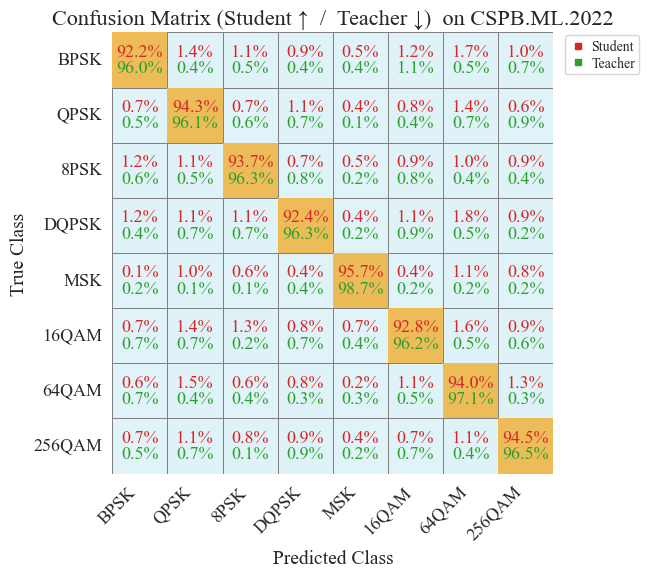

In [11]:
import numpy as np
import torch, seaborn as sns, matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.metrics import confusion_matrix
import torch.nn as nn, torch.nn.functional as F
import matplotlib as mpl
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap
# =============================================================
# 0. 参数 & 主题
# =============================================================
device  = "cuda" if torch.cuda.is_available() else "cpu"
classes = ['BPSK','QPSK','8PSK','DQPSK','MSK','16QAM','64QAM','256QAM']
n_cls   = len(classes)

# 1⃣ 先设 seaborn 风格（若你不用 seaborn，可省略）
sns.set_style('white')

# 2⃣ 手动把 Times New Roman 的 TTF 注册进 Matplotlib
tnr_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
font_manager.fontManager.addfont(tnr_path)

# 3⃣ 取出“字体内部名称”，确保写对
tnr_name = font_manager.FontProperties(fname=tnr_path).get_name()
print("内部家族名：", tnr_name)          # 通常就是 'Times New Roman'

# 4⃣ 设置全局 serif 字体优先为 Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = [tnr_name]          # 若想回退可追加其它 serif
mpl.rcParams.update({
    'font.size'      : 14,        # 统一字号
    'axes.titlesize' : 16,
    'axes.labelsize' : 15,
})

cmap_blue = sns.color_palette('Blues', as_cmap=True)

# =============================================================
# 1. 定义网络（与训练保持一致，此处略去重复实现）
#    —— 若已 import，可直接跳到 §2 加载权重
# =============================================================
class BasicBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_c)
        self.down  = nn.Identity()
        if stride != 1 or in_c != out_c:
            self.down = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c))
    def forward(self, x):
        y = F.relu(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        return F.relu(y + self.down(x))

def make_layer(in_c, out_c, blocks, stride):
    layers = [BasicBlock(in_c, out_c, stride)]
    layers += [BasicBlock(out_c, out_c) for _ in range(blocks-1)]
    return nn.Sequential(*layers)

class SCDResNet64(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 64, 7, 1, 3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1))
        self.layer1 = make_layer( 64,  64, 3, 1)
        self.layer2 = make_layer( 64, 128, 3, 2)
        self.layer3 = make_layer(128, 192, 3, 2)
        self.layer4 = make_layer(192, 256, 3, 2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), nn.Flatten(),
            nn.Dropout(0.5), nn.Linear(256, n_cls))
    def forward(self,x):
        x=self.stem(x)
        x=self.layer1(x);x=self.layer2(x)
        x=self.layer3(x);x=self.layer4(x)
        return self.head(x)

class SCDResNet64_Student(nn.Module):
    def __init__(self, n_cls=8):
        super().__init__()
        ch=[24,24,48,72,96]
        self.stem = nn.Sequential(
            nn.Conv2d(1,ch[0],3,1,1,bias=False),
            nn.BatchNorm2d(ch[0]), nn.ReLU(inplace=True),
            nn.MaxPool2d(3,2,1))
        self.layer1 = make_layer(ch[0],ch[1],2,1)
        self.layer2 = make_layer(ch[1],ch[2],2,2)
        self.layer3 = make_layer(ch[2],ch[3],2,2)
        self.layer4 = make_layer(ch[3],ch[4],2,2)
        self.head   = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), nn.Flatten(),
            nn.Dropout(0.4), nn.Linear(ch[4],n_cls))
    def forward(self,x):
        x=self.stem(x)
        x=self.layer1(x);x=self.layer2(x)
        x=self.layer3(x);x=self.layer4(x)
        return self.head(x)

# =============================================================
# 2. 加载权重
# =============================================================
student = SCDResNet64_Student(n_cls).to(device)
teacher = SCDResNet64(n_cls).to(device)

student.load_state_dict(torch.load('best_student.pth',    map_location=device))
teacher.load_state_dict(torch.load('best_scd_resnet.pth', map_location=device))

# =============================================================
# 3. 预测函数
# =============================================================
@torch.no_grad()
def get_preds(model, loader):
    model.eval()
    p, y = [], []
    for xb, yb in loader:               # test_ld 为你的 DataLoader
        p.append(model(xb.to(device)).argmax(1).cpu())
        y.append(yb.cpu())
    return torch.cat(p).numpy(), torch.cat(y).numpy()

y_pred_s, y_true = get_preds(student, test_ld)
y_pred_t, _      = get_preds(teacher, test_ld)

# =============================================================
# 4. 计算混淆矩阵百分比 & 注释文本
# =============================================================
def cm_percent(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=range(n_cls))
    return cm / cm.sum(1, keepdims=True) * 100, cm

cm_s_perc, cm_s = cm_percent(y_true, y_pred_s)
cm_t_perc, cm_t = cm_percent(y_true, y_pred_t)

# —— 构造双行注释：Student 在上，Teacher 在下 ——  
annot = np.empty_like(cm_s_perc, dtype=object)
for i in range(n_cls):
    for j in range(n_cls):
        if cm_s[i,j] == cm_t[i,j] == 0:
            annot[i,j] = ''
        else:
            annot[i,j] = f'{cm_s_perc[i,j]:.1f}%\n{cm_t_perc[i,j]:.1f}%'

# =============================================================
# 5. 单图绘制
# =============================================================
# 自定义配色：明亮蓝色用于热力图
cmap_student = LinearSegmentedColormap.from_list(
    "custom_blue", ["#e0f3f8", "#abd9e9", "#74add1", "#4575b4"]
)

# 创建图形与坐标轴
fig, ax = plt.subplots(figsize=(7,6))

# 绘制热力图底色（使用学生预测百分比 cm_s_perc）
sns.heatmap(cm_s_perc, ax=ax, cmap=cmap_student, cbar=False,
            annot=False, linewidths=.4, linecolor='grey',
            vmin=0, vmax=100, mask=(cm_s==0), square=True)

# 添加对角线橙色方块高亮（可选保留）
for i in range(n_cls):
    rect = plt.Rectangle((i, i), 1, 1,
                         facecolor='#FFC34E',
                         edgecolor='none',
                         alpha=0.9,
                         zorder=3)
    ax.add_patch(rect)

# 写入每个单元格的两行百分比：上为学生（红），下为教师（绿）
for i in range(n_cls):
    for j in range(n_cls):
        if cm_s[i, j] == cm_t[i, j] == 0:
            continue
        ax.text(j + 0.5, i + 0.35, f'{cm_s_perc[i, j]:.1f}%',
                ha='center', va='center', color='#d62728', fontsize=13)
        ax.text(j + 0.5, i + 0.65, f'{cm_t_perc[i, j]:.1f}%',
                ha='center', va='center', color='#2ca02c', fontsize=13)

# 设置坐标轴标签与标题
ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=13)
ax.set_yticklabels(classes, rotation=0,  fontsize=13)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('True Class',      fontsize=14)
plt.title('Confusion Matrix (Student ↑  /  Teacher ↓)  on CSPB.ML.2022', fontsize=16)

# 设置图例（Legend）
student_legend = mlines.Line2D([], [], color='#d62728', marker='s', linestyle='None',
                               markersize=5, label='Student')
teacher_legend = mlines.Line2D([], [], color='#2ca02c', marker='s', linestyle='None',
                               markersize=5, label='Teacher')
ax.legend(
    handles=[student_legend, teacher_legend],
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.2,
    handletextpad=0.4,
    labelspacing=0.2,
    handlelength=1.2,
    borderpad=0.3,
    fontsize=10
)

plt.tight_layout()
plt.show()